# Lasso Regression or L1 Regression

Lasso regression is a common modeling technique to do regularization, wherein we penalize the number of features in a model in order to only keep the most important features. This can be particularly important when you have a dataset with 100,000+ features.

Lasso regression comes with a parameter, lambda, and the higher the lambda, the most feature coefficients are zero.That is, when lambda is 0, Lasso regression produces the same coefficients as a linear regression. When lambda is very very large, all coefficients are zero.

This notebook is dedicated to study the effect of lambda on the coefficients, how L1 helps in reducing overfitting and feature selection.

In [1]:
# Load library
import numpy as np
import pandas as pd
from sklearn.datasets import load_boston
import matplotlib.pyplot as plt

%matplotlib inline 

### Loading the Dataset

In [2]:
boston = load_boston()
X = boston['data']
y = boston['target']
names = boston['feature_names']

X.shape, y.shape

((506, 13), (506,))

### Standardize Features

In [3]:
from sklearn.preprocessing import StandardScaler

In [4]:
# Standarize features
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

In [5]:
X_std.shape

(506, 13)

### Choosing the best lambda

Since lambda is a builtin keyword in python, lets use regParam (regularization parameter) instead.

In [6]:
from sklearn.linear_model import Lasso

def lassoParam(lambdas, X, y):
    '''
    Takes in a list of lambdas. 
    Outputs a dataframe containing the coefficients of lasso regressions from each lambda.
    '''
    df = pd.DataFrame() #empty dataframe
   
    df['Feature Name'] = names
    
    for regParam in lambdas:
        lasso = Lasso(alpha = regParam)
        
        # Fit the lasso regression
        lasso.fit(X, y)

        # Create a column of coefficient values
        df['Lambda = %f' % regParam] = lasso.coef_
        
    return df

In [7]:
lassoParam([0.0001, 0.01, 0.5, 5, 10], X_std, y)

,Feature Name,Lambda = 0.000100,Lambda = 0.010000,Lambda = 0.500000,Lambda = 5.000000,Lambda = 10.000000
0,CRIM,-0.927866,-0.900245,-0.115265,-0.000000,-0.0
1,ZN,1.081086,1.035916,0.000000,0.000000,0.0
2,INDUS,0.139960,0.046924,-0.000000,-0.000000,-0.0
3,CHAS,0.681771,0.684152,0.397079,0.000000,0.0
4,NOX,-2.055877,-1.980551,-0.000000,-0.000000,-0.0
5,RM,2.674402,2.687312,2.974259,0.477937,0.0
6,AGE,0.019026,0.000000,-0.000000,-0.000000,-0.0
7,DIS,-3.103667,-3.058301,-0.170569,0.000000,0.0
8,RAD,2.660381,2.481844,-0.000000,-0.000000,-0.0
9,TAX,-2.074993,-1.899442,-0.000000,-0.000000,-0.0


Notice that as the lambda value increases, more features have a coefficient of 0. From the above dataframe, we see that for lambda = 0.5, only most important features are selected! 

### Lasso Regression

Let's first split the data into training and testing sets. Train the model using training data and evaluate the model using testing sets.

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X_std, y, test_size = 0.3)

In [9]:
# Create lasso regression object
lasso = Lasso(alpha = 0.5)

# Train the model using the training sets
lasso.fit(X_train, Y_train) 

Lasso(alpha=0.5, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [10]:
# Predict the values using the model
Y_lasso_predict = lasso.predict(X_test)

# Evaluation
from sklearn import metrics

RMSE = np.sqrt(metrics.mean_squared_error(Y_lasso_predict,Y_test))
print ("Root Mean Square Error: {}".format(RMSE))

Root Mean Square Error: 5.466162428879723


Text(0, 0.5, 'actual value')

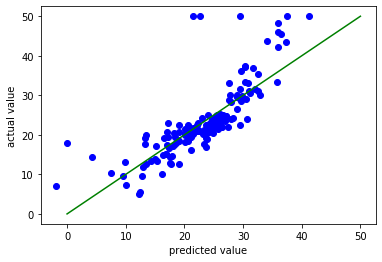

In [11]:
# Plotting the result
plt.plot(Y_lasso_predict, Y_test, 'bo')
plt.plot([0,50], [0,50], 'g-')
plt.xlabel('predicted value')
plt.ylabel('actual value')